# Author : Khushi Shah

## The Sparks Foundation- Data Science & Business Analytics Intern

### Task 1 : Prediction Using Supervised ML
 - The problem statement is to predict the percentage of a student based on the number of study hours and we have to calculate the predicted score if a student studies for 9.25 hours/day.

## Understanding the Data

In [1]:
# Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data from the given url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

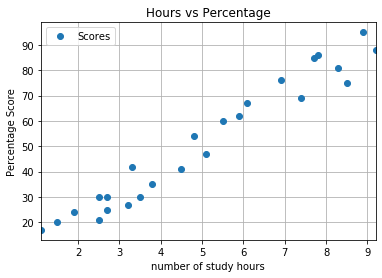

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage')  
plt.xlabel('number of study hours')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

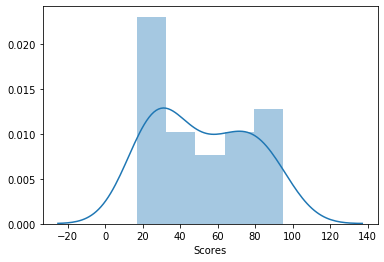

In [7]:
sns.distplot(data['Scores'],bins=5)
plt.show()

## Performing Simple Linear Regression

In [8]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [9]:
# Train-Test Split
#To split our variable into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [10]:
#Now let's take a look at train and test datasets individually

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18, 1)
(18,)
(7, 1)
(7,)


In [11]:
X_train

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [12]:
y_train

array([86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95,
       41], dtype=int64)

In [13]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [14]:
y_test

array([20, 27, 69, 30, 62, 35, 24], dtype=int64)

## Training Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

print("Training Complete")

Training Complete


The slope is:  [9.94167834]
The intercept is:  1.932204253151646


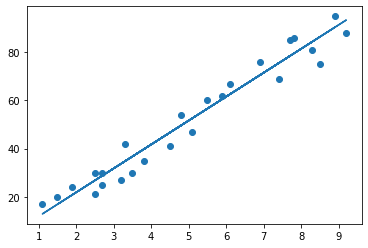

In [30]:
#plotting the regression line
m=regressor.coef_
c=regressor.intercept_
line=m*X+c

print("The slope is: ", m)
print("The intercept is: ", c)

plt.scatter(X,y)
plt.plot(X,line)
plt.show()

## Checking Accuracy Scores for both training as well as testing sets

In [18]:
print("Training Score",regressor.score(X_train,y_train)*100)
print("Test Score",regressor.score(X_test,y_test)*100)

Training Score 94.84509249326872
Test Score 93.67661043365054


In [19]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [20]:
print(y_test)

[20 27 69 30 62 35 24]


### Making Predictions

In [21]:
y_pred=regressor.predict(X_test)

In [22]:
print(y_pred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [23]:
# Comparing Actual vs Predicted
dataframe=pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
dataframe

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


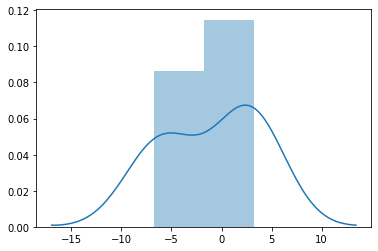

In [24]:
sns.distplot(np.array(y_test-y_pred))

#### What will be predicted score if a student studies for 9.25 hrs in a day?

In [25]:
hours=9.25
pred_new=regressor.predict([[hours]])
print("No of Study hours are {}".format(hours))
print("Predicted Score is {}".format(pred_new[0]))

No of Study hours are 9.25
Predicted Score is 93.89272889341655


## Evaluating the model

In [26]:
from sklearn import metrics

In [28]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.130879918502486
Mean Squared Error:  4.130879918502486


#### Conclusion:
For a student who studies 9.25 hours a day the model predicts his/her score to be 93.89272889341655